In [1]:
from recast.CPT import CPT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Croatian site 

In [2]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7

points = np.array([
[576697.34, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])

layout.add_measurement_instances(points = points, points_type = 'misc')
layout.generate_mesh()
layout.optimize_measurements()

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'misc' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).
Correct latitudinal zone!
Correct longitudinal zone!
Optimizing misc measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'optimized' added to the measurements dictionary!
Measurements dictionary contains 2 different measurement type(s).


In [3]:
layout.generate_combined_layer(points_type = 'misc')

Generating combined layer for misc measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


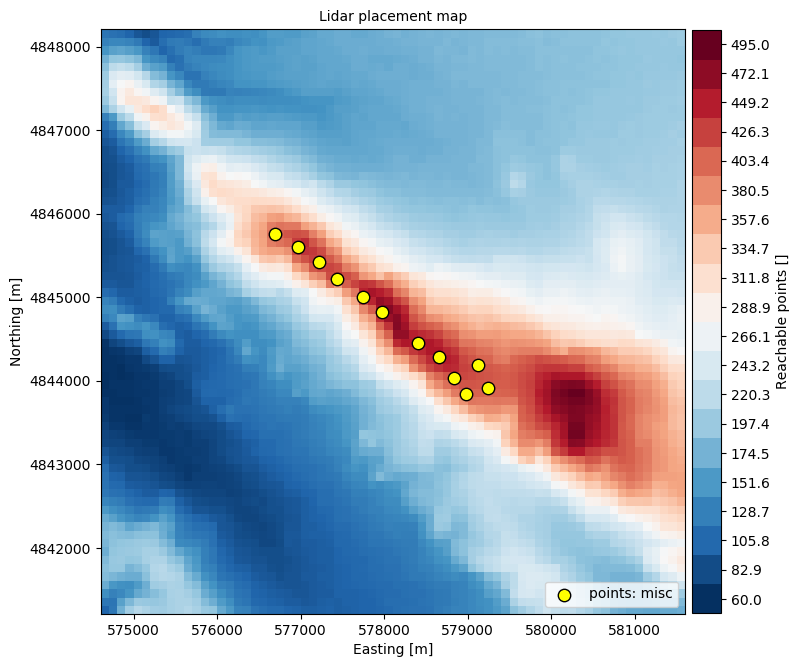

In [55]:
layout.plot_layer(layout.layer_selector('orography'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [ ]:
layout.add_lidar_instance(position = np.array([580600 + 350,4845700 + 200,100]), lidar_id = 'koshava')
layout.add_lidar_instance(position = np.array([580800 - 1800,4845300 + 2500, 271]), lidar_id = 'whittle')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 - 2000,100]), lidar_id = 'sirocco')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 + 2000,100]), lidar_id = 'sterenn')

layout.update_lidar_instance(lidar_id = 'koshava', points_type = 'misc')
layout.update_lidar_instance(lidar_id = 'whittle', points_type = 'misc')

In [ ]:
layout.sync_trajectory(lidar_ids = ['whittle', 'koshava'])

In [ ]:
layout.export_measurement_scenario(lidar_id = 'koshava')

In [5]:
from osgeo import gdal, osr, ogr, gdal_array

In [22]:
ds = gdal.Open('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/landcover_cropped_utm.tif')
geotrans = ds.GetGeoTransform()
proj = ds.GetProjection()

In [32]:
dst_filename = '/Users/niva/Desktop/tmp/xxx.tiff'
x_pixels = layout.orography_layer.shape[0]  # number of pixels in x
y_pixels = layout.orography_layer.shape[1]  # number of pixels in y
driver = gdal.GetDriverByName('GTiff')
dataset = driver.Create(dst_filename,x_pixels, y_pixels, 1,gdal.GDT_Byte)
dataset.GetRasterBand(1).WriteArray(np.flip(layout.orography_layer, axis = 0))


dataset.SetGeoTransform(geotrans)
dataset.SetProjection(proj)
dataset.FlushCache()
dataset=None

In [34]:
from PIL import Image

In [53]:
input_array = layout.orography_layer

In [60]:
array_rescaled = (255.0 / input_array.max() * (input_array - input_array.min())).astype(np.uint8)
array_rescaled = np.flip(array_rescaled, axis = 0)
image = Image.fromarray(np.uint8(plt.cm.RdBu_r(array_rescaled)*255))

multi_band_array = np.array(image)

rows = multi_band_array.shape[0]
cols = multi_band_array.shape[1]
bands = multi_band_array.shape[2]

dst_filename = '/Users/niva/Desktop/tmp/xxx.tiff'
x_pixels = rows  # number of pixels in x
y_pixels = cols  # number of pixels in y
driver = gdal.GetDriverByName('GTiff')
options = ['PHOTOMETRIC=RGB', 'PROFILE=GeoTIFF']
dataset = driver.Create(dst_filename,x_pixels, y_pixels, bands,gdal.GDT_Byte,options = options)


for band in range(bands):
    print(band)
    dataset.GetRasterBand(band + 1).WriteArray(multi_band_array[:,:,band])
    
    
dataset.SetGeoTransform(geotrans)
dataset.SetProjection(proj)
dataset.FlushCache()
dataset=None    

0
1
2
3


In [47]:
multi_band_array[:,:,3]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [27]:
for band in range(bands):
    output_raster.GetRasterBand(band + 1).WriteArray(array[:,:,band])

71

In [78]:
array_rescaled.reshape((71*2, 2, 71*2, 2))

ValueError: cannot reshape array of size 5041 into shape (142,2,142,2)

In [99]:
in_ds = gdal.Open('/Users/niva/Desktop/tmp/xxx.tiff')
in_band = in_ds.GetRasterBand(1)

In [100]:
# Multiply output size by 3 
resize_vl = 10
out_rows = in_band.YSize * resize_vl
out_columns = in_band.XSize * resize_vl

# Create new data source (raster)
gtiff_driver = gdal.GetDriverByName('GTiff')
out_ds = gtiff_driver.Create('/Users/niva/Desktop/tmp/xxx.tiff', out_columns, out_rows)
out_ds.SetProjection(in_ds.GetProjection())
geotransform = list(in_ds.GetGeoTransform())

# Edit the geotransform so pixels are one-sixth previous size
geotransform[1] /= resize_vl
geotransform[5] /= resize_vl
out_ds.SetGeoTransform(geotransform)

data = in_band.ReadAsArray(buf_xsize=out_columns, buf_ysize=out_rows)  # Specify a larger buffer size when reading data
out_band = out_ds.GetRasterBand(1)
out_band.WriteArray(data)

out_band.FlushCache()
out_band.ComputeStatistics(False)
out_ds.BuildOverviews('average', [2, 4, 8, 16, 32, 64])


0

In [98]:
data.shape

(710, 710)

In [62]:
bin_size = input_size // output_size
small_image = large_image.reshape((1, output_size, bin_size,
                                      output_size, bin_size)).max(4).max(2)

'-outsize 10% 10% -of PNG'

In [70]:
gdal.Translate('/Users/niva/Desktop/tmp/xxx2.tiff','/Users/niva/Desktop/tmp/xxx.tiff', options='-outsize 100% 100%')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x1194e6cc0> >

In [76]:
gdal.Warp('/Users/niva/Desktop/tmp/xxx2.tiff', '/Users/niva/Desktop/tmp/xxx.tiff', width=500, height=500)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x1194e6d20> >

In [ ]:
gdal.Warp('/Users/niva/Desktop/tmp/xxx2.tiff', '/Users/niva/Desktop/tmp/xxx.tif